# Acrobot Final Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from monitor.eval_agent import running_avg, get_confidence_interval

In [7]:
reward_dtnet = [] #  31 internal Nodes
reward_fcnn = [] # fcnn with 2 hidden layers of 64 nodes each
reward_dgt = []
reward_prolo = []
reward_icct = []

seeds = [100, 105, 110, 115, 120]
num_seeds = 5
for i in seeds:
    reward_dtnet.append(
        np.loadtxt(
            f'../../logs/acrobot_cpu/dtnet/aaai_15n_32x32c_rand/seed{i}_rewards.txt'  #minimal/adam_5e-2_nodup
        ))

    # fcnn
    reward_fcnn.append(
        np.loadtxt(
            f'../../logs/acrobot_cpu/fcnn/aaai_16x16_32x32c_v2_rand/seed{i}_rewards.txt'
        ))

    # dgt acrobot_cpu/dgt/aaai_15n_32x32c_v2_rand/
    reward_dgt.append(
        np.loadtxt(
            f'../../logs/acrobot_cpu/dgt/aaai_15n_32x32c_v2_rand/seed{i}_rewards.txt'
        ))

    # prolo acrobot_cpu/icct/aaai_15na_soft_32x32c_rand/
    reward_prolo.append(
        np.loadtxt(
            f'../../logs/acrobot_cpu/icct/aaai_15na_soft_32x32c_rand/seed{i}_rewards.txt'
        ))

    # icct acrobot_cpu/icct/aaai_15n_32x32c_rand/
    reward_icct.append(
        np.loadtxt(
            f'../../logs/acrobot_cpu/icct/aaai_15n_32x32c_rand/seed{i}_rewards.txt'
        ))

reward_dtnet = np.array(reward_dtnet)
reward_fcnn = np.array(reward_fcnn)
reward_dgt = np.array(reward_dgt)
reward_prolo = np.array(reward_prolo)
reward_icct = np.array(reward_icct)


### Running Average (smooth over last 100 eps)

In [8]:
avg_dtnet = running_avg(reward_dtnet, num_seeds=num_seeds)
avg_fcnn = running_avg(reward_fcnn, num_seeds=num_seeds)
avg_dgt = running_avg(reward_dgt, num_seeds=num_seeds)
avg_prolo = running_avg(reward_prolo, num_seeds=num_seeds)
avg_icct = running_avg(reward_icct, num_seeds=num_seeds)


In [9]:
mean_dtnet, cil_dtnet, cih_dtnet = get_confidence_interval(avg_dtnet)
mean_fcnn, cil_fcnn, cih_fcnn = get_confidence_interval(avg_fcnn)
mean_dgt, cil_dgt, cih_dgt = get_confidence_interval(avg_dgt)
mean_prolo, cil_prolo, cih_prolo = get_confidence_interval(avg_prolo)
mean_icct, cil_icct, cih_icct = get_confidence_interval(avg_icct)



## Plot for Acrobot

In [10]:
labels = ['DTSemNet', 'FCNN', 'ProLoNet', 'DGT', 'ICCT']
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']

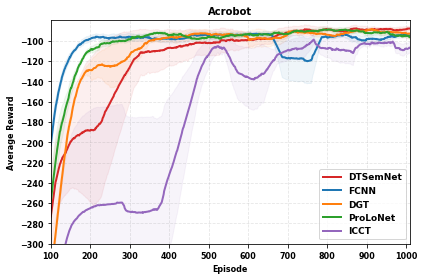

In [13]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the data

alpha = 0.07

# dtnet
ax.plot(np.arange(len(mean_dtnet)),
        mean_dtnet,
        color=colors[0],
        linewidth=2,
        label=labels[0])
ax.fill_between(np.arange(len(mean_dtnet)),
                cil_dtnet,
                cih_dtnet,
                color=colors[0],
                alpha=alpha)

# fcnn
ax.plot(np.arange(len(mean_fcnn)),
        mean_fcnn,
        color=colors[1],
        linewidth=2,
        label=labels[1])
ax.fill_between(np.arange(len(mean_fcnn)),
                cil_fcnn,
                cih_fcnn,
                color=colors[1],
                alpha=alpha)

# DGT
ax.plot(np.arange(len(mean_dgt)),
        mean_dgt,
        color=colors[3],
        linewidth=2,
        label=labels[3])
ax.fill_between(np.arange(len(mean_dgt)),
                cil_dgt,
                cih_dgt,
                color=colors[3],
                alpha=alpha)

# prolo
ax.plot(np.arange(len(mean_prolo)),
        mean_prolo,
        color=colors[2],
        linewidth=2,
        label=labels[2])
ax.fill_between(np.arange(len(mean_prolo)),
                cil_prolo,
                cih_prolo,
                color=colors[2],
                alpha=alpha)

# ICCT
ax.plot(np.arange(len(mean_icct)),
        mean_icct,
        color=colors[4],
        linewidth=2,
        label=labels[4])
ax.fill_between(np.arange(len(mean_icct)),
                cil_icct,
                cih_icct,
                color=colors[4],
                alpha=alpha)



# ax.axhline(y=80, color='black', linewidth=1, linestyle='--', alpha=0.5)
ax.axhline(y=500, color='black', linewidth=1, linestyle='--', alpha=0.5)
# Add axis labels and title
ax.set_xlabel('Episode', fontsize=8, fontweight='bold')
ax.set_ylabel('Average Reward', fontsize=8, fontweight='bold')
ax.set_title('Acrobot',
             fontsize=10,
             fontweight='bold')

# Add legend and grid
ax.legend(loc='lower right',
          prop={'weight': 'bold', 'size': 9})
ax.grid(True, which='major', linestyle='--', color='gray', alpha=0.2)

# Customize tick parameters
plt.yticks(np.arange(-300, -80, 20))
plt.xticks(np.arange(100, 1010, 100))
ax.set_ylim([-300, -80])
ax.set_xlim([100, 1010])
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
# ax.minorticks_on()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

# Adjust the layout to make it look clean
fig.tight_layout()

# Save the figure as a PDF
fig.savefig('../../results/aaai_plots/acrobot.png', bbox_inches='tight', dpi=300)